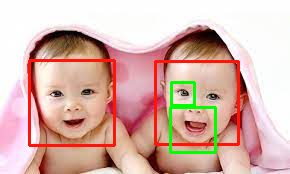

-1

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the cascade (haarcascade_frontalface) from source
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")
# Read the input image from the source
img = cv2.imread('images.jpeg')
# Convert RGB image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detecting faces
faces = face_cascade.detectMultiScale(gray,1.2,4)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (10, 20, 255), 2)

    eyes = eye_cascade.detectMultiScale(gray,1.2,4)
for (x,y,w,h) in eyes:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
# Display the output
cv2_imshow(img)
cv2.waitKey()

In [ ]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
#load test image
test1 = cv2.imread('images.jpeg')

#convert the test image to gray image as opencv face detector expects gray images
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

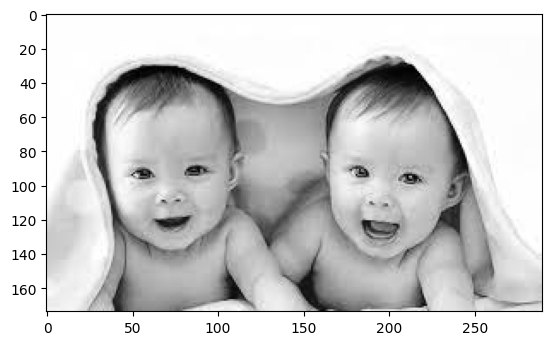

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(gray_img, cmap='gray')

In [ ]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
#let's detect multiscale (some images may be closer to camera than others) images
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);
#print the number of faces found
print('Faces found: ', len(faces))

Faces found:  2


In [ ]:
test = haar_face_cascade.load('/content/haarcascade_frontalface_default.xml')
print(test)



True


In [ ]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed
    img_copy = colored_img.copy()

    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);

    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return img_copy

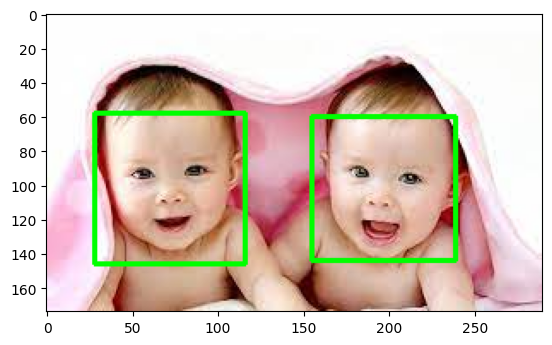

In [ ]:
#load another image
test2 = cv2.imread('images.jpeg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))